## Phase One Project

### Business Undestanding

#### Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 
#### This analysis aims to explore the type of films that are currently doing best at the box office. As it is assumed films with much more popularity than others are concluded as the films doing well but there is definitely more to it than that hence this analysis.

## Data Understanding
#### The data sources for this analysis will be pulled from several separate files.

#### tn.movie_budget.csv
#### Contents: Data about production budget of film creation and their gross profit both worldwide and domestic.
#### bom.movie_gross.csv
#### Contents: Data about profits gained from films for all available years from 2010 to 2018
#### im.db
#### Contents: Database about the ratings of films by fans of all films 


### Main Objective 
#### Which films are currently doing best at the box-office?

### Specific Objective
#### - Does the production budget of a film affect the gross profit of the films sales?
#### - Which genres have the highest number of votes from viewers?
#### - What is the profitability of films over time?

### Loading necessary libraries

In [575]:
# Set up necessary libraries
import csv
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Does the production budget of a film affect the gross profit of the films sales?

#### Data Understanding

In [576]:
# Reading the data from the csv file
df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")


### Now we want to get familiar with the data.

In [577]:
# Loading the first rows of the data
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [578]:
# Loading the last rows of the data
df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [579]:
# The column names of the column data
df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [580]:
# The number of columns and rows in the data
df.shape

(5782, 6)

In [581]:
# Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [639]:
### The above cell shows that there are no missing values in the column e.g production_budget has same count of values as domestic_gross.

In [582]:
# Checking for outliers
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### Data Preparation

###  Removing of Duplicate entries in the data and any unwanted observations.

In [584]:
# Identifying any duplicate entries
df.duplicated().any()

False

In [585]:
# The above cell indicates that there are no duplicate entries in the data.

##### ii) Identifying any missing values

In [638]:
# Identifying missing values
df.isnull().any() 
df.isna().sum() == 0 # Confirms the number of missing values in the columns is true

movie                True
production_budget    True
domestic_gross       True
worldwide_gross      True
dtype: bool

In [588]:
# Stripping the data in columns of characters
df.head()
df['production_budget'] = df['production_budget'].str.replace("$", "").str.replace(",", "")
df['domestic_gross'] = df['domestic_gross'].str.replace("$", "").str.replace(",", "")
df['worldwide_gross'] = df['worldwide_gross'].str.replace("$", "").str.replace(",", "")
df.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [589]:
# Dropping columns that are not in use
df = df.drop(labels=['id', 'release_date'], axis=1)


In [590]:
# Converting remaining column data to datatype integer
x = ['production_budget','domestic_gross','worldwide_gross']
df[x] = df[x].astype(pd.Int64Dtype())


In [591]:
# Overview of the data to confirm datatypes have changed to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   Int64 
 2   domestic_gross     5782 non-null   Int64 
 3   worldwide_gross    5782 non-null   Int64 
dtypes: Int64(3), object(1)
memory usage: 197.8+ KB


In [592]:
# Selecting the first ten rows of the column data
x = df[:10]
x

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,Avengers: Infinity War,300000000,678815482,2048134200
7,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,Justice League,300000000,229024295,655945209
9,Spectre,300000000,200074175,879620923


### Data Visualization

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


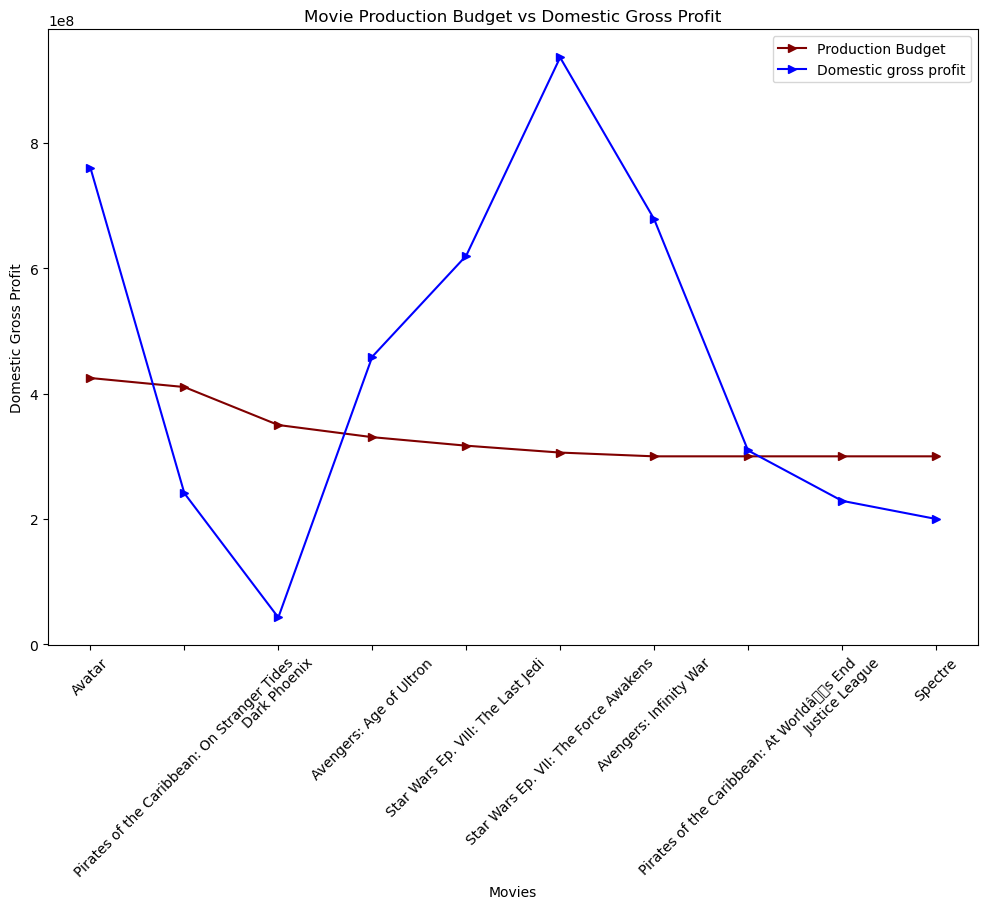

In [593]:
# Set up plot to compare production budget of films created and their domestic gross profits
domestic_gross = x['domestic_gross']# creating variables used to represent column data
production_budget = x['production_budget']
movie_s = x['movie']
fig= plt.figure(figsize=(12,8)) # plots figure size

plt.plot(movie_s, production_budget, label='Production Budget',color = 'maroon', marker=">")# plots data on graph

plt.plot(movie_s, domestic_gross, label='Domestic gross profit', color = 'blue', marker = ">")# plots data on graph

plt.xticks(rotation=45)

plt.xlabel('Movies') # sets label on x-axis
plt.ylabel('Domestic Gross Profit') # sets label on y-axis
plt.title('Movie Production Budget vs Domestic Gross Profit')# sets title of graph
leg = plt.legend(loc='upper right')# displays what lines on the graph represent
plt.show();# displays graph


#### Challenge the solution in the above this cell

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


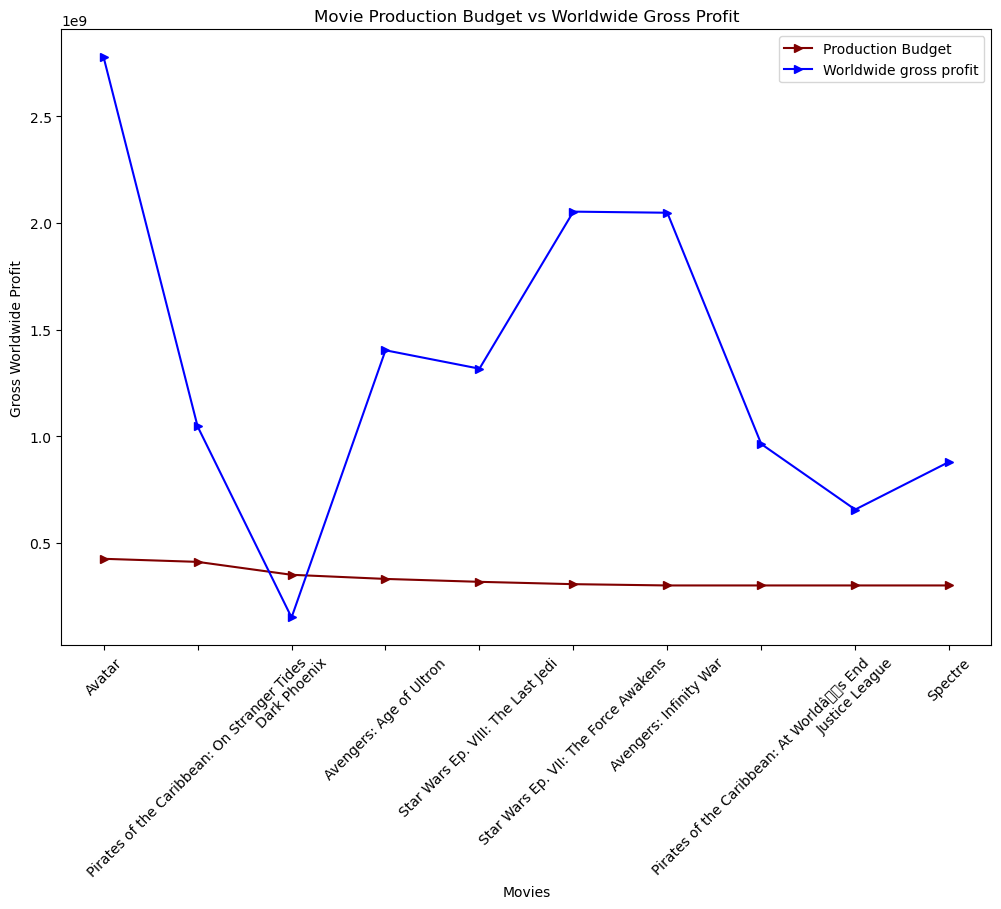

In [594]:
# Set up plot to compare the production budget of films created and their world wide gross profits
production_budget = x['production_budget'] # creating variables to represent column data
worldwide_gross = x['worldwide_gross']
movie_s = x['movie']
fig= plt.figure(figsize=(12,8)) # sets figure size

plt.plot(movie_s, production_budget, label='Production Budget',color = 'maroon', marker=">")# plots data on graph
plt.plot(movie_s, worldwide_gross, label='Worldwide gross profit', color = 'blue', marker=">")


plt.xticks(rotation=45)

plt.xlabel('Movies')# sets label on x-axis
plt.ylabel('Gross Worldwide Profit')# sets label on y-axis
plt.title('Movie Production Budget vs Worldwide Gross Profit')# sets title of graph
leg = plt.legend(loc='upper right')# states what line represents on graph
plt.show()# displays graph


### Data Analysis
#### Movies with high production budgets generate bigger domestic and worldwide gross profits. It is therefore highly recommended that in aim of film creation the company should seek to obtain a high amount of capital to be able to invest into starting film creation as a low production budget leads to low profits. The films that are currently doing best at the box office are those which had higher production budgets because they had higher profits compared to low budget films.


## 2. Which genres have the highest number of votes from viewers?

#### In the cell below we... 
##### - Open up a connection to the SQLite database and store the connection in a variable called `conn`
##### - Initialize a SQLite cursor object with the variable name `cursor`.

In [595]:
# Create a connection to the im.db database
conn = sqlite3.connect("zippedData/im.db")

### Data Understanding
### Table Names

##### Below, we use `pd.read_sql` to output the table names in the SQLite database. 

In [596]:
# Reading data from the sql tables
basics_df = pd.read_sql_query('''SELECT * FROM movie_basics''',conn)


In [597]:
# Reading data from the sql tables
ratings_df = pd.read_sql_query('''SELECT * FROM movie_ratings''',conn)


#### The tables will now be identified as dataframes

In [598]:
# Checking first rows of the dataframe data
ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [599]:
# Checking last rows of the dataframe data
ratings_df.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [600]:
# Checking the overview of the dataframe data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [601]:
# Checking the shape of the dataframe data
ratings_df.shape

(73856, 3)

In [602]:
# Checking column names of the dataframe
ratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [603]:
# Checking first rows of the dataframe
basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [604]:
# Checking last rows of the dataframe
basics_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [605]:
# Checking column names of the dataframe
basics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [606]:
# Checking overview of the data
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [607]:
# Checking shape of the data
basics_df.shape

(146144, 6)

### Data Preparation

In [608]:
# Checking for duplicate entries
ratings_df.duplicated().any()
# There are no duplicate entries in the data columns.

False

In [609]:
basics_df.duplicated().any() # Checking for duplicate entries

False

#### There are no duplicate entries in these data columns

In [610]:
# Checking for missing values in the data
ratings_df.isnull().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

In [611]:
# There are no missing values
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [612]:
# Checking for missing values
basics_df.isnull().any()

movie_id           False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

In [613]:
# There are columns with missing data in the data columns.
# Dropping the missing values
basics_df.dropna(subset=['original_title', 'runtime_minutes','genres'], inplace=True, axis=0)

In [614]:
# Checking overview of the data
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


### Vizualizations

#### Joining the Dataframes Together

#### First, identify the shared key between heroes_df and powers_df. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [615]:
basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [616]:
ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


##### In the cell below, create a new dataframe called ratings_and_basics_df that contains the joined data. After identifying the shared key to be 'movie_id' the method used to create the new dataframe is merge() method.

In [617]:
ratings_and_basics_df = ratings_df.merge(basics_df, on='movie_id')

ratings_and_basics_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [618]:
# Checking for the new shape of the dataframe
ratings_and_basics_df.shape

(65720, 8)

In [619]:
# Dropping columns that are not needed in the dataframe
ratings_and_basics_df.drop(labels=['primary_title','original_title','start_year','runtime_minutes'], inplace=True, axis=1)

In [620]:
# Checking columns have been dropped
ratings_and_basics_df

,movie_id,averagerating,numvotes,genres
0,tt10356526,8.3,31,Romance
1,tt10384606,8.9,559,Documentary
2,tt1042974,6.4,20,Drama
3,tt1043726,4.2,50352,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,"Mystery,Thriller"
...,...,...,...,...
65715,tt9768966,8.6,27,Documentary
65716,tt9805820,8.1,25,Documentary
65717,tt9844256,7.5,24,"Action,Animation,Sci-Fi"
65718,tt9886934,7.0,5,Documentary


In [621]:
# Checking for outliers
ratings_and_basics_df.describe()

,averagerating,numvotes
count,65720.000000,6.572000e+04
mean,6.320902,3.954674e+03
std,1.458878,3.208823e+04
min,1.000000,5.000000e+00
25%,5.500000,1.600000e+01
50%,6.500000,6.200000e+01
75%,7.300000,3.520000e+02
max,10.000000,1.841066e+06


### Data Visualization

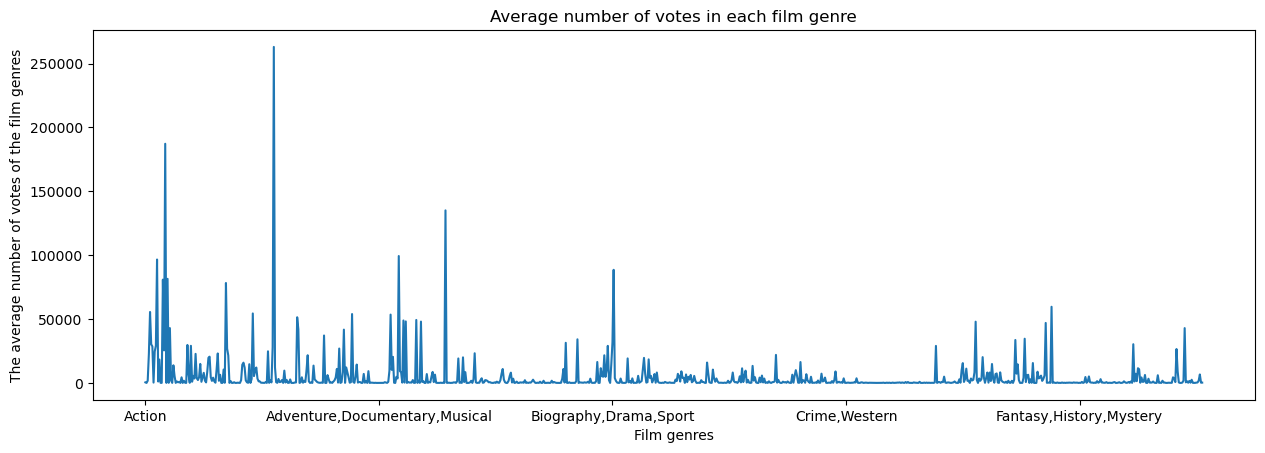

In [622]:
# Find the mean of all genres' number of votes

avg_votes = ratings_and_basics_df.groupby('genres')['numvotes'].agg('mean')
# Setting up plot representing the average number of votes for each film genre
plt.figure().set_figwidth(15) #sets figure size
avg_votes.plot()
plt.xlabel('Film genres') #sets label on x-axis
plt.ylabel('The average number of votes of the film genres') #sets label on y-axis
plt.title('Average number of votes in each film genre') # sets title on graph
plt.show() #Displays graph




### Data Analysis
#### Films created in genres such adventure , documentary and action have had the highest number of votes which would indicate that their are the films currently doing best at the box office. In getting into the film industry the company should focus on making films in these genres with the highest number of votes if and obviously the company would want succes in film creation.


## 3.  What is the profitability of films over time?

### Data Understanding

In [623]:
# Reads the data in the csv file
movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [624]:
movie_gross.head() ## Prints out first rows of the data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [625]:
movie_gross.tail() # Prints out last rows of the data

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [626]:
movie_gross.info() #Provide overview of data to get number of values in each column
# Values are not of an equal number in the columns data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [627]:
# Checking the column names of the dataFrame
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [628]:
# Checking the shape of the datafranme
movie_gross.shape

(3387, 5)

### Data Preparation

In [629]:
# Checking for duplicate entries
movie_gross.duplicated().any()

False

In [630]:
# Checking for missing values in the data
movie_gross.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [631]:
# Dropping rows of data with missing values
movie_gross.dropna(subset=['studio','domestic_gross','foreign_gross'],inplace=True,axis=0)

In [632]:
movie_gross.isnull().sum()==0 # This means there are now no missing values in the dataframe

title             True
studio            True
domestic_gross    True
foreign_gross     True
year              True
dtype: bool

In [633]:
movie_gross.info() # Provides overview of data after dropping missing values

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [634]:
# Checking for outliers
movie_gross.describe()

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


In [635]:
# Grouping films by the maximum domestic gross profit earned
sum_gross = movie_gross.groupby('title')['domestic_gross'].agg('max')
sum_gross # The max domestic gross profit each film has earned


title
'71                                 1300000.0
10 Cloverfield Lane                72100000.0
102 Not Out                         1300000.0
11-11-11                              32800.0
12 Strong                          45800000.0
                                     ...     
Zoolander 2                        28800000.0
Zootopia                          341300000.0
[Rec] 2                               27800.0
mother!                            17800000.0
xXx: The Return of Xander Cage     44900000.0
Name: domestic_gross, Length: 2007, dtype: float64

#### Data Visualization

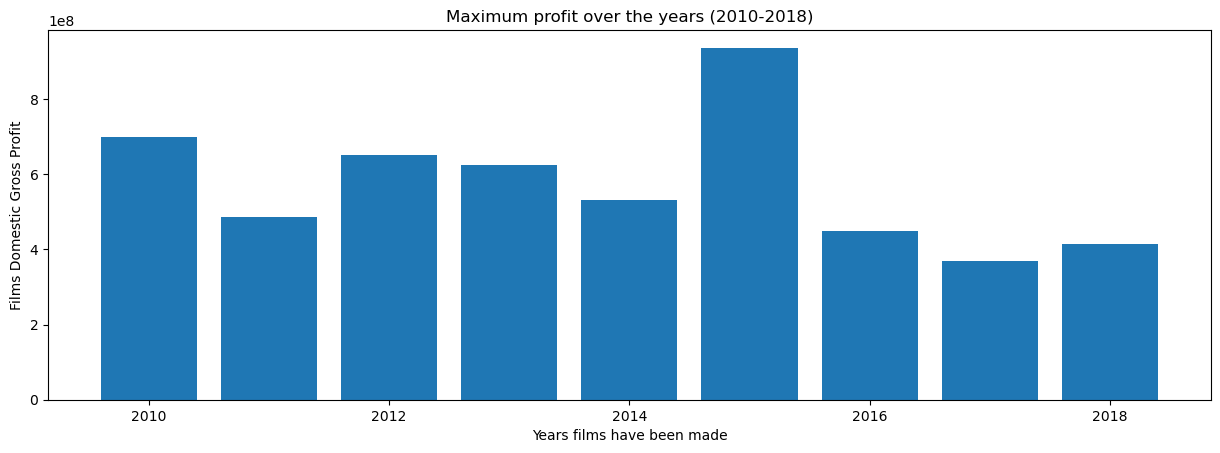

In [636]:
# Set up plot
year = movie_gross['year']

plt.figure().set_figwidth(15)# plots the figure size
plt.bar(year, sum_gross) # plots bar on axis
plt.xlabel('Years films have been made')# sets label on x-axis
plt.ylabel('Films Domestic Gross Profit')# sets label on y-axis
plt.title('Maximum profit over the years (2010-2018)') # sets title of graph
plt.show() # displays graph



#### Data Analysis
#### When films are created the above diagram clearly indicates that sometimes they may do well sometimes they may not. But over a period of time films created can do well and be the best at the box-office. In analysing the progress of how well a film created can do it is both a negative and positive curve but what is important is that it is mostly positive. The films currently doing best at the box-office can have had its success increase over time and not instantly after creation.